In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

### Prepare data and define classification functions

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def train_rf(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']
    # convert y to three levels based on the values
    y = pd.cut(y, bins=[-1, 0.5, 2, 11], labels=['Low', 'Medium', 'High'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [10, 20, 50, 70, 100, 150, 200]
    criterion = ['entropy', 'log_loss', 'gini']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = RandomForestClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred), digits=4)

    # explainer = shap.TreeExplainer(rfc)
    # shap_values = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values, X_test, class_names=rfc.classes_)
    # print(rfc.classes_[0])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 0], X_test)
    # print(rfc.classes_[1])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 1], X_test)
    # print(rfc.classes_[2])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 2], X_test)

    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                        index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    fig, ax = plt.subplots()
    feature_importances[:20].plot.bar(ax=ax)
    ax.set_title("Feature Importances of Random Forest Model")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    print(feature_importances[:5])
    return y_test, rfc_pred

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

def train_gradient_boosted(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']
    # convert y to three levels based on the values
    y = pd.cut(y, bins=[-1, 0.5, 2, 11], labels=['Low', 'Medium', 'High'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [10, 20, 50, 70, 100, 150, 200]
    criterion = ['squared_error', 'friedman_mse']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = GradientBoostingClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = GradientBoostingClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred))

    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                        index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    fig, ax = plt.subplots()
    feature_importances[:20].plot.bar(ax=ax)
    ax.set_title("Feature Importances of Random Forest Model")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    print(feature_importances[:5])

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def train_knn(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']
    # convert y to three levels based on the values
    y = pd.cut(y, bins=[-1, 0.5, 2, 11], labels=['Low', 'Medium', 'High'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [5, 10, 20, 50]
    criterion = ['uniform', 'distance']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = KNeighborsClassifier(n_neighbors=n_est, weights=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test.values)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = KNeighborsClassifier(n_neighbors=best_params_est, weights=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test.values)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred))

In [23]:
data = pd.read_csv('../../0_data/1_intermediate_ML/selected_features_one_hot_complexity_16_continuous_demanding_all_crash.csv')
data.columns

Index(['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building',
       'lead_car_road', 'lead_car_vegetation', 'lead_car_sky', 'lead_car_car',
       'car_count', 'lead_car_car_count', 'image_id', 'weather_cloudy',
       'weather_foggy', 'weather_rainy', 'weather_snowy',
       'traffic_condition_light', 'traffic_condition_moderate',
       'road_condition_icy', 'road_condition_wet', 'visibility_low visibility',
       'time_of_day_dusk/dawn', 'time_of_day_night',
       'road_layout_slight curve', 'road_layout_straight', 'road_type_highway',
       'road_type_parking', 'road_type_residential area',
       'road_type_rural road', 'road_width_narrow', 'road_width_wide', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', 'demanding_level', 'speed', 'speed_std', 'speed_mean',
       'lon_acceleration_mean', 'lon_acceleration_std', 'lon_acceleration_max',
       'lon_acceleration_min', 'crash_likelihood', 'speed_deviation',
       'speed

In [24]:
features = {
    'oneformer': ['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building',
       'lead_car_road', 'lead_car_vegetation', 'lead_car_sky', 'lead_car_car',
       'car_count', 'lead_car_car_count'],
    'semantic': ['weather_cloudy',
       'weather_foggy', 'weather_rainy', 'weather_snowy',
       'traffic_condition_light', 'traffic_condition_moderate',
       'road_condition_icy', 'road_condition_wet', 'visibility_low visibility',
       'time_of_day_dusk/dawn', 'time_of_day_night',
       'road_layout_slight curve', 'road_layout_straight', 'road_type_highway',
       'road_type_parking', 'road_type_residential area',
       'road_type_rural road', 'road_width_narrow', 'road_width_wide'],
    'complexity': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15'],
    'driving': ['speed', 'speed_std', 'speed_mean',
       'lon_acceleration_mean', 'lon_acceleration_std', 'lon_acceleration_max',
       'lon_acceleration_min', 'speed_deviation',
       'speed_deviation_normalized']
}

In [25]:
del data['image_id']

### Complexity

n_estimators: 200
Criteria: entropy
[[137  68 119]
 [ 11 926 224]
 [ 27 177 858]]
              precision    recall  f1-score   support

        High       0.78      0.42      0.55       324
         Low       0.79      0.80      0.79      1161
      Medium       0.71      0.81      0.76      1062

    accuracy                           0.75      2547
   macro avg       0.76      0.68      0.70      2547
weighted avg       0.76      0.75      0.75      2547

    importance
14    0.128611
8     0.120468
10    0.119748
0     0.117231
1     0.109270


(4305       Low
 937     Medium
 8925    Medium
 1893    Medium
 6404       Low
          ...  
 9979       Low
 8522    Medium
 8307       Low
 4181       Low
 8539       Low
 Name: crash_likelihood, Length: 2547, dtype: category
 Categories (3, object): ['Low' < 'Medium' < 'High'],
 array(['Low', 'Medium', 'Medium', ..., 'High', 'Low', 'Low'], dtype=object))

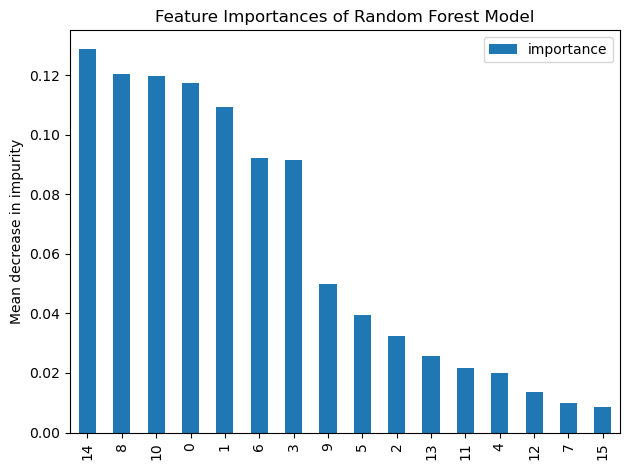

In [29]:
train_rf(data[features['complexity'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[ 58  94 172]
 [ 20 828 313]
 [ 29 308 725]]
              precision    recall  f1-score   support

        High       0.54      0.18      0.27       324
         Low       0.67      0.71      0.69      1161
      Medium       0.60      0.68      0.64      1062

    accuracy                           0.63      2547
   macro avg       0.60      0.52      0.53      2547
weighted avg       0.63      0.63      0.62      2547

    importance
14    0.159327
10    0.159171
3     0.107896
8     0.095015
0     0.084394


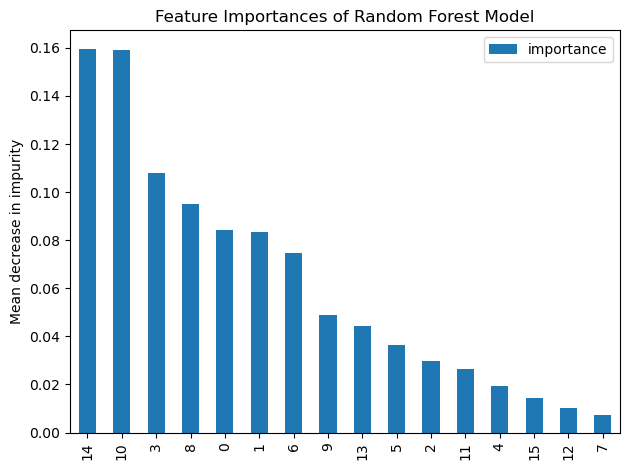

In [30]:
train_gradient_boosted(data[features['complexity'] + ['crash_likelihood']])

In [31]:
train_knn(data[features['complexity'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[193  53  78]
 [ 31 939 191]
 [ 71 164 827]]
              precision    recall  f1-score   support

        High       0.65      0.60      0.62       324
         Low       0.81      0.81      0.81      1161
      Medium       0.75      0.78      0.77      1062

    accuracy                           0.77      2547
   macro avg       0.74      0.73      0.73      2547
weighted avg       0.77      0.77      0.77      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + complexity

n_estimators: 200
Criteria: gini
[[147  32 145]
 [  1 974 186]
 [ 26 191 845]]
              precision    recall  f1-score   support

        High       0.84      0.45      0.59       324
         Low       0.81      0.84      0.83      1161
      Medium       0.72      0.80      0.76      1062

    accuracy                           0.77      2547
   macro avg       0.79      0.70      0.72      2547
weighted avg       0.78      0.77      0.77      2547

                     importance
vegetation             0.121092
lead_car_vegetation    0.099097
sky                    0.068633
0                      0.064081
lead_car_sky           0.064025


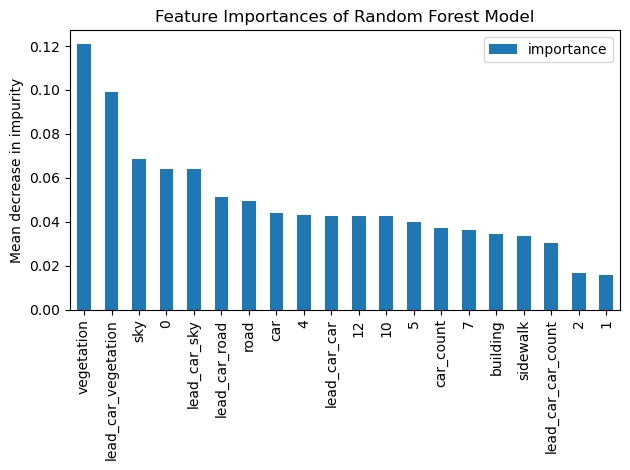

In [11]:
y_test, y_pred = train_rf(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])
y_test.to_csv('y_test_complexity_oneformer.csv')
pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_complexity_oneformer_16_continuous.csv')

n_estimators: 200
Criteria: squared_error
[[113  39 172]
 [  4 921 236]
 [ 51 230 781]]
              precision    recall  f1-score   support

        High       0.67      0.35      0.46       324
         Low       0.77      0.79      0.78      1161
      Medium       0.66      0.74      0.69      1062

    accuracy                           0.71      2547
   macro avg       0.70      0.63      0.65      2547
weighted avg       0.71      0.71      0.70      2547

                     importance
vegetation             0.365807
lead_car_vegetation    0.111660
lead_car_sky           0.051864
0                      0.050568
car_count              0.041145


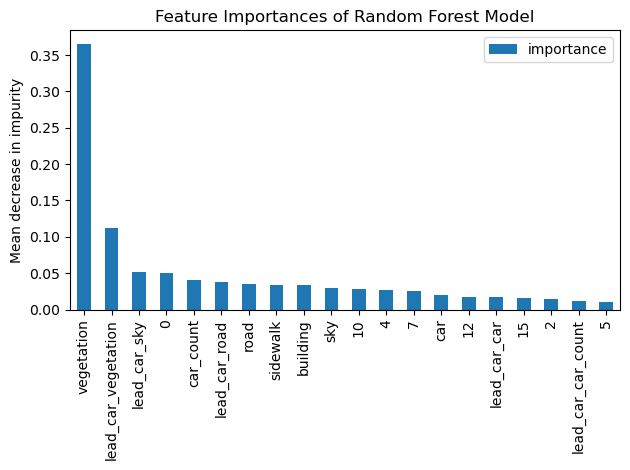

In [12]:
train_gradient_boosted(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])

In [13]:
train_knn(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[126  49 149]
 [ 20 932 209]
 [ 69 287 706]]
              precision    recall  f1-score   support

        High       0.59      0.39      0.47       324
         Low       0.74      0.80      0.77      1161
      Medium       0.66      0.66      0.66      1062

    accuracy                           0.69      2547
   macro avg       0.66      0.62      0.63      2547
weighted avg       0.69      0.69      0.69      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + driving + complexity

n_estimators: 200
Criteria: gini
[[ 208   28   88]
 [   1 1071   89]
 [  18  129  915]]
              precision    recall  f1-score   support

        High       0.92      0.64      0.75       324
         Low       0.87      0.92      0.90      1161
      Medium       0.84      0.86      0.85      1062

    accuracy                           0.86      2547
   macro avg       0.88      0.81      0.83      2547
weighted avg       0.86      0.86      0.86      2547

                     importance
lead_car_vegetation    0.089983
vegetation             0.089088
speed_mean             0.050119
speed                  0.049124
sky                    0.048015


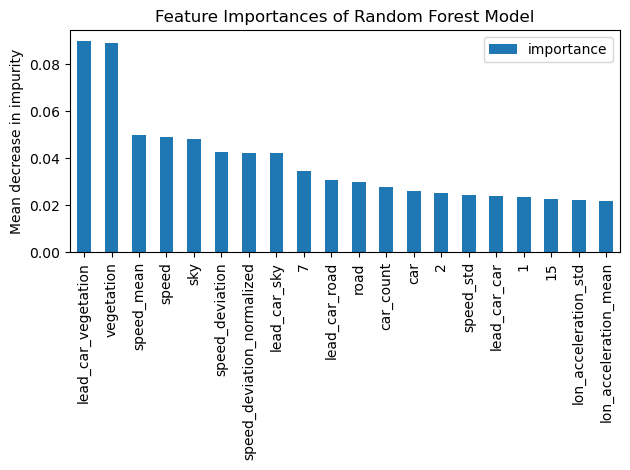

In [20]:
train_rf(data[features['oneformer'] + features['complexity'] + features['driving'] + ['crash_likelihood']])
y_test.to_csv('y_test_oneformer_driving_complexity_oneformer.csv')
pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_oneformer_driving_complexity_oneformer_16_continuous.csv')

n_estimators: 200
Criteria: squared_error
[[171  33 120]
 [  4 968 189]
 [ 65 197 800]]
              precision    recall  f1-score   support

        High       0.71      0.53      0.61       324
         Low       0.81      0.83      0.82      1161
      Medium       0.72      0.75      0.74      1062

    accuracy                           0.76      2547
   macro avg       0.75      0.70      0.72      2547
weighted avg       0.76      0.76      0.76      2547

                     importance
vegetation             0.282356
lead_car_vegetation    0.114164
speed_deviation        0.063113
speed                  0.059844
speed_mean             0.053907


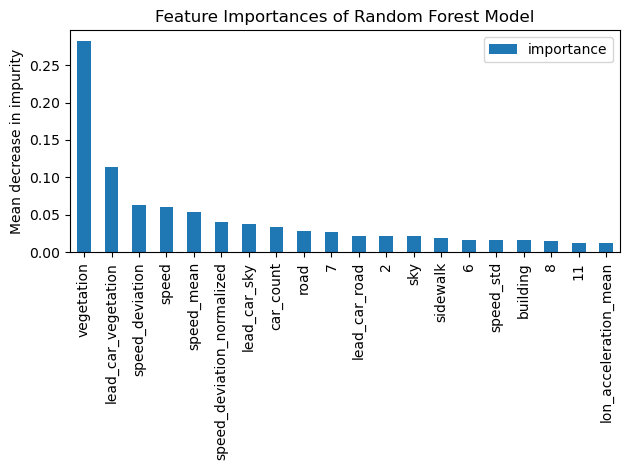

In [21]:
train_gradient_boosted(data[features['oneformer'] + features['complexity'] + features['driving'] + ['crash_likelihood']])

In [22]:
train_knn(data[features['oneformer'] + features['complexity'] + features['driving'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[175  36 113]
 [ 11 957 193]
 [ 66 228 768]]
              precision    recall  f1-score   support

        High       0.69      0.54      0.61       324
         Low       0.78      0.82      0.80      1161
      Medium       0.72      0.72      0.72      1062

    accuracy                           0.75      2547
   macro avg       0.73      0.70      0.71      2547
weighted avg       0.74      0.75      0.74      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### All features

n_estimators: 200
Criteria: entropy
[[ 235   18   71]
 [   1 1099   61]
 [  16   88  958]]
              precision    recall  f1-score   support

        High       0.93      0.73      0.82       324
         Low       0.91      0.95      0.93      1161
      Medium       0.88      0.90      0.89      1062

    accuracy                           0.90      2547
   macro avg       0.91      0.86      0.88      2547
weighted avg       0.90      0.90      0.90      2547

                     importance
lead_car_vegetation    0.081396
vegetation             0.081232
speed                  0.055266
speed_mean             0.053956
sky                    0.040884


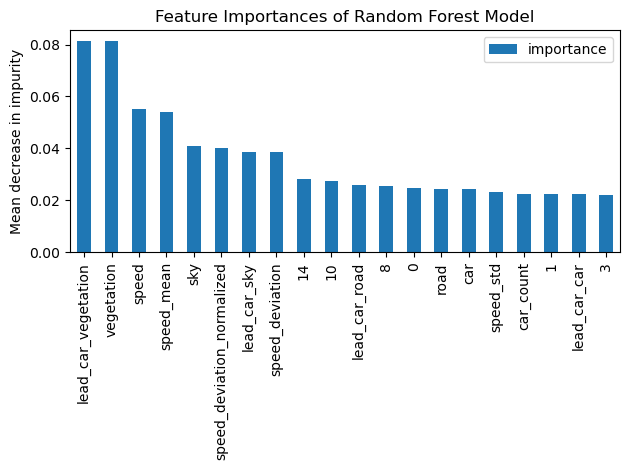

In [26]:
train_rf(data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])
y_test.to_csv('y_test_oneformer_driving_semantic_complexity_oneformer.csv')
pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_oneformer_driving_semantic_complexity_oneformer_16_continuous.csv')

n_estimators: 200
Criteria: squared_error
[[193  24 107]
 [  1 998 162]
 [ 42 142 878]]
              precision    recall  f1-score   support

        High       0.82      0.60      0.69       324
         Low       0.86      0.86      0.86      1161
      Medium       0.77      0.83      0.79      1062

    accuracy                           0.81      2547
   macro avg       0.81      0.76      0.78      2547
weighted avg       0.81      0.81      0.81      2547

                     importance
vegetation             0.265310
lead_car_vegetation    0.102636
speed_deviation        0.052679
speed_mean             0.047580
speed                  0.046983


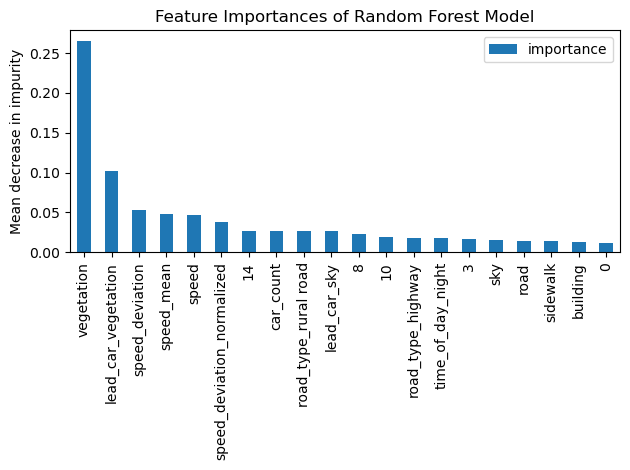

In [27]:
train_gradient_boosted(data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

In [28]:
train_knn(data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[ 214   24   86]
 [   8 1014  139]
 [  52  122  888]]
              precision    recall  f1-score   support

        High       0.78      0.66      0.72       324
         Low       0.87      0.87      0.87      1161
      Medium       0.80      0.84      0.82      1062

    accuracy                           0.83      2547
   macro avg       0.82      0.79      0.80      2547
weighted avg       0.83      0.83      0.83      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
